<a href="https://colab.research.google.com/github/1234-ad/1234-ad/blob/main/Global_Trends_Inflation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set(style="whitegrid")

Load Dataset

In [ ]:
# Manual upload method (for Colab)
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['global_inflation.csv']))  # Replace with your actual file name
df.head()

Saving global_inflation.csv to global_inflation.csv


,Country,Year,Inflation Rate
0,United States,2000,1.39
1,United States,2001,2.82
2,United States,2002,2.78
3,United States,2003,3.51
4,United States,2004,1.92


Inspect Data

In [ ]:
df.shape
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         138 non-null    object 
 1   Year            138 non-null    int64  
 2   Inflation Rate  138 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+ KB


np.int64(0)

Data Cleaning

In [ ]:
# Drop duplicate rows if any
df = df.drop_duplicates()

# Check for missing values
missing = df.isnull().sum()
print(missing[missing > 0])

# Example: Fill or drop
df = df.dropna(subset=['Inflation Rate'])

Series([], dtype: int64)


Basic EDA - Target Columns

In [ ]:
print(df['Country'].nunique())
print(df['Year'].min(), '-', df['Year'].max())

# Unique countries
df['Country'].unique()[:10]

6
2000 - 2022


array(['United States', 'India', 'China', 'Germany', 'Brazil', 'Japan'],
      dtype=object)

Global Average Inflation Over Time

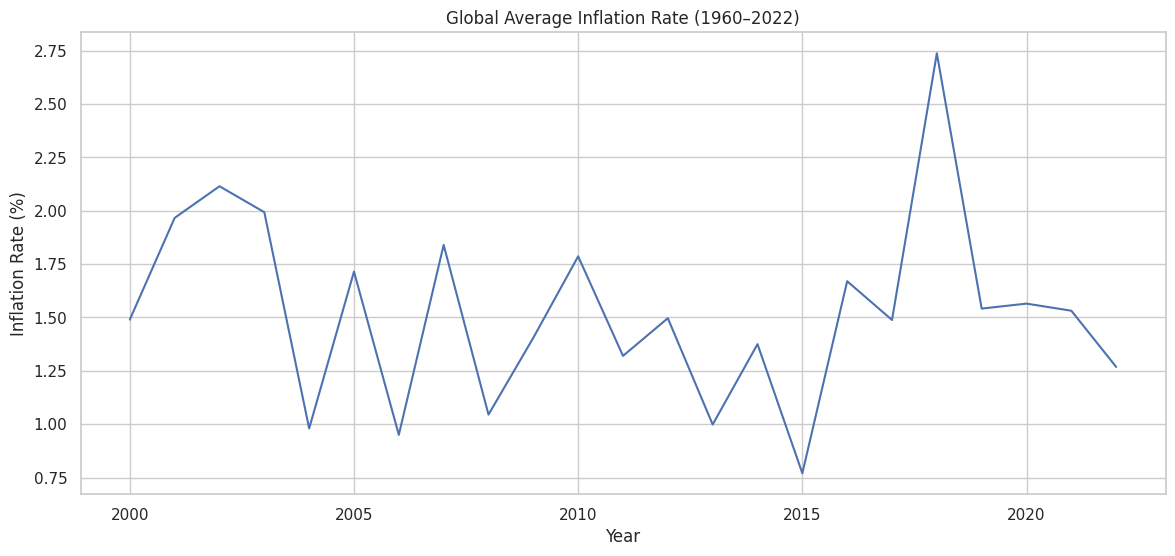

In [ ]:
world_avg = df.groupby('Year')['Inflation Rate'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(x='Year', y='Inflation Rate', data=world_avg)
plt.title('Global Average Inflation Rate (1960–2022)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.show()

Compare Multiple Countries

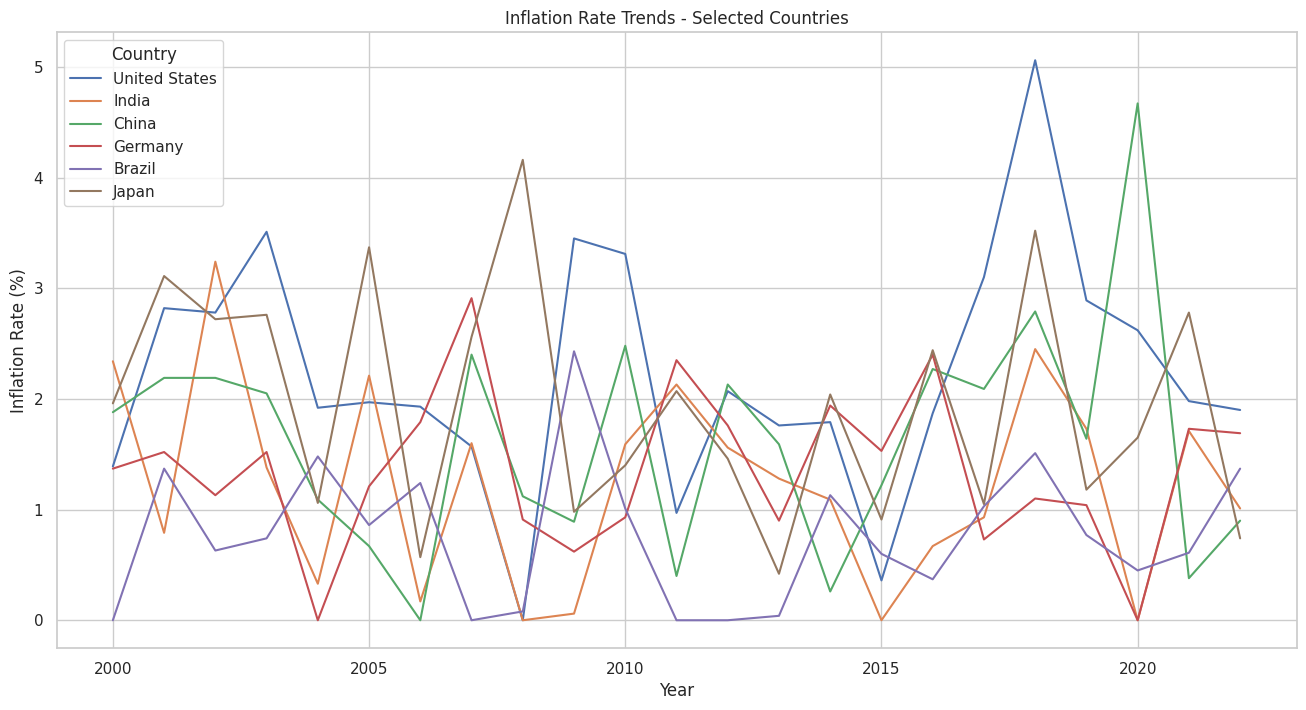

In [ ]:
countries = ['United States', 'India', 'China', 'Germany', 'Brazil', 'Japan']
subset = df[df['Country'].isin(countries)]

plt.figure(figsize=(16,8))
sns.lineplot(x='Year', y='Inflation Rate', hue='Country', data=subset)
plt.title('Inflation Rate Trends - Selected Countries')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.show()

Heatmap of Countries vs Years

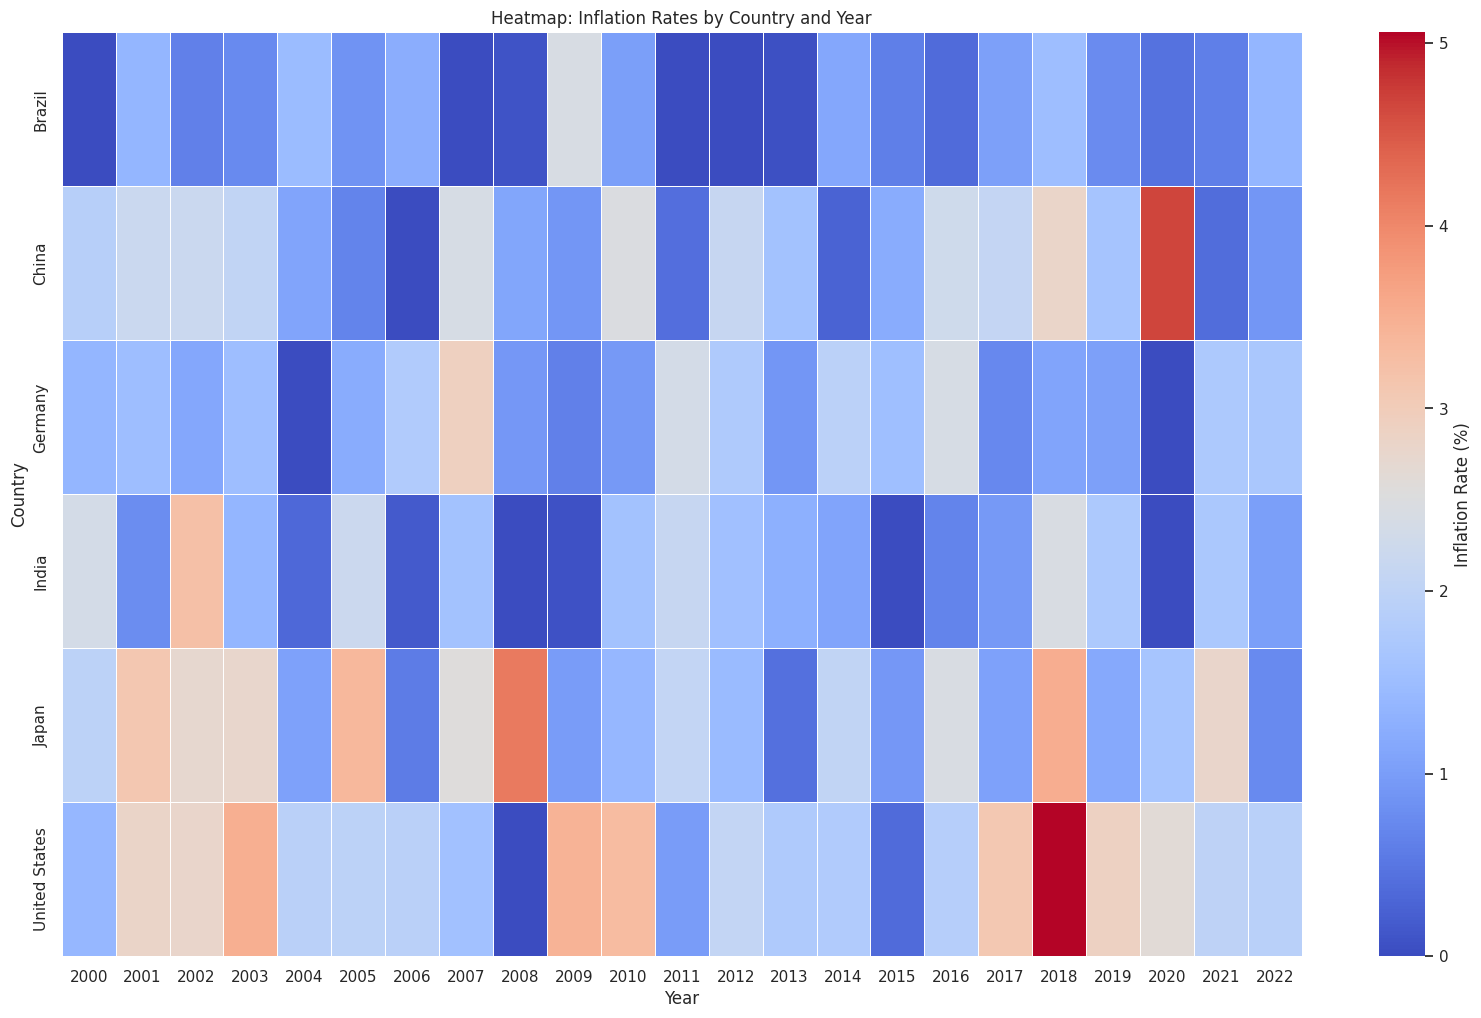

In [ ]:
pivot = df.pivot_table(values='Inflation Rate', index='Country', columns='Year')

plt.figure(figsize=(20,12))
sns.heatmap(pivot, cmap='coolwarm', cbar_kws={'label': 'Inflation Rate (%)'}, linewidths=0.5)
plt.title('Heatmap: Inflation Rates by Country and Year')
plt.show()

Top Countries with Highest Avg Inflation

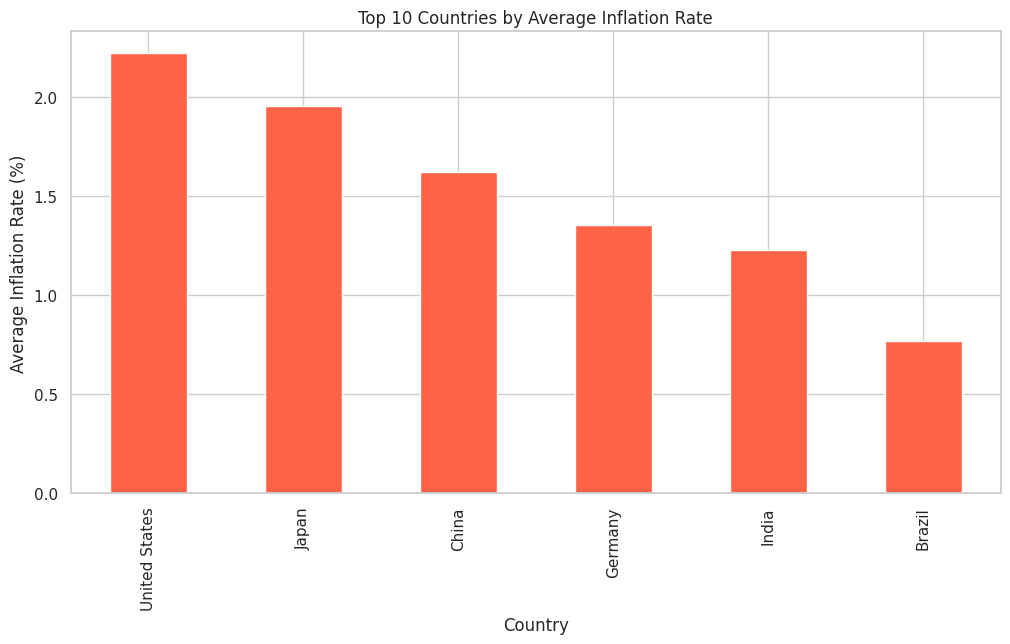

In [ ]:
country_avg = df.groupby('Country')['Inflation Rate'].mean().sort_values(ascending=False).head(10)
country_avg.plot(kind='bar', figsize=(12,6), color='tomato')
plt.title('Top 10 Countries by Average Inflation Rate')
plt.ylabel('Average Inflation Rate (%)')
plt.show()

Outlier Detection

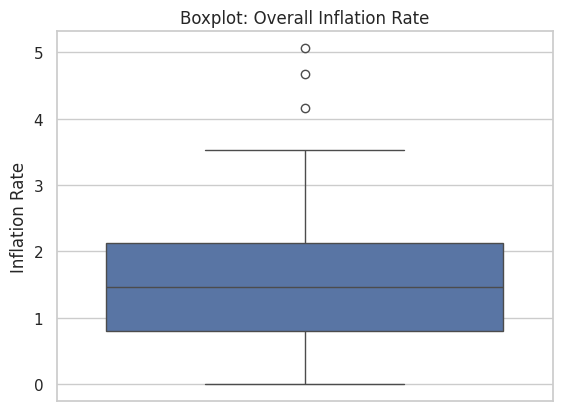

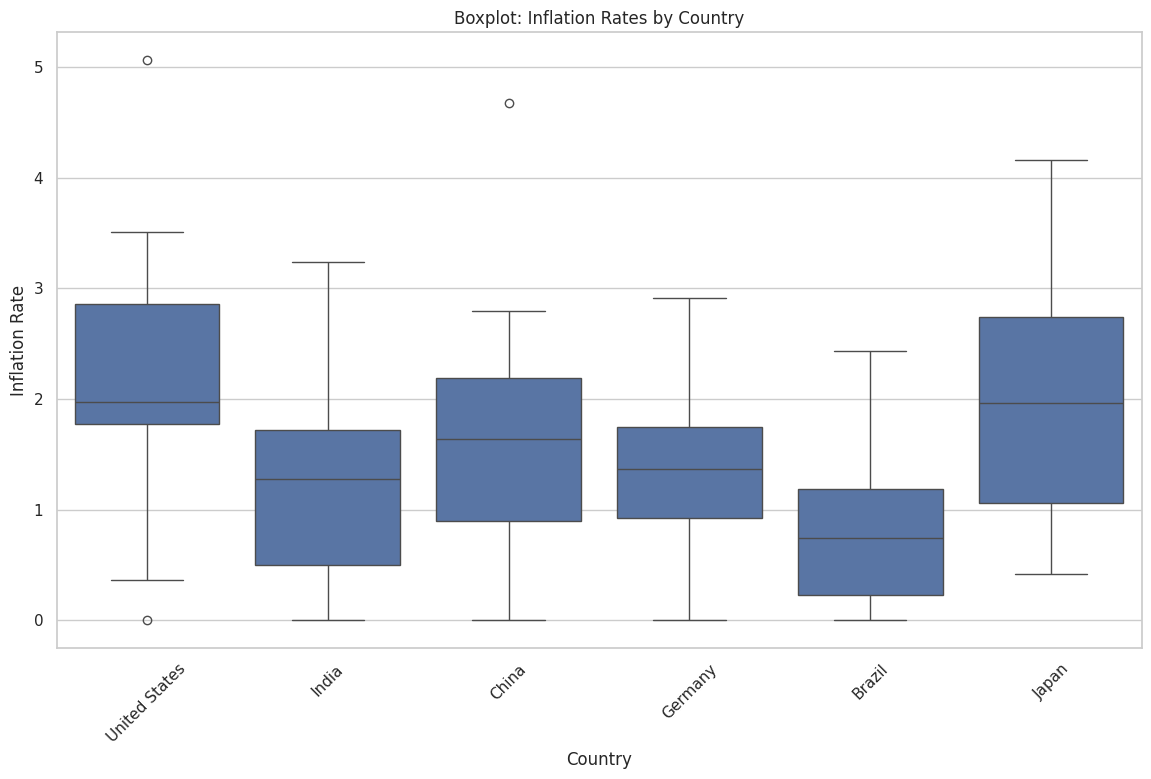

In [ ]:
sns.boxplot(y='Inflation Rate', data=df)
plt.title('Boxplot: Overall Inflation Rate')
plt.show()

# By country:
plt.figure(figsize=(14,8))
sns.boxplot(x='Country', y='Inflation Rate', data=subset)
plt.xticks(rotation=45)
plt.title('Boxplot: Inflation Rates by Country')
plt.show()

Rolling Averages for Economic Cycles

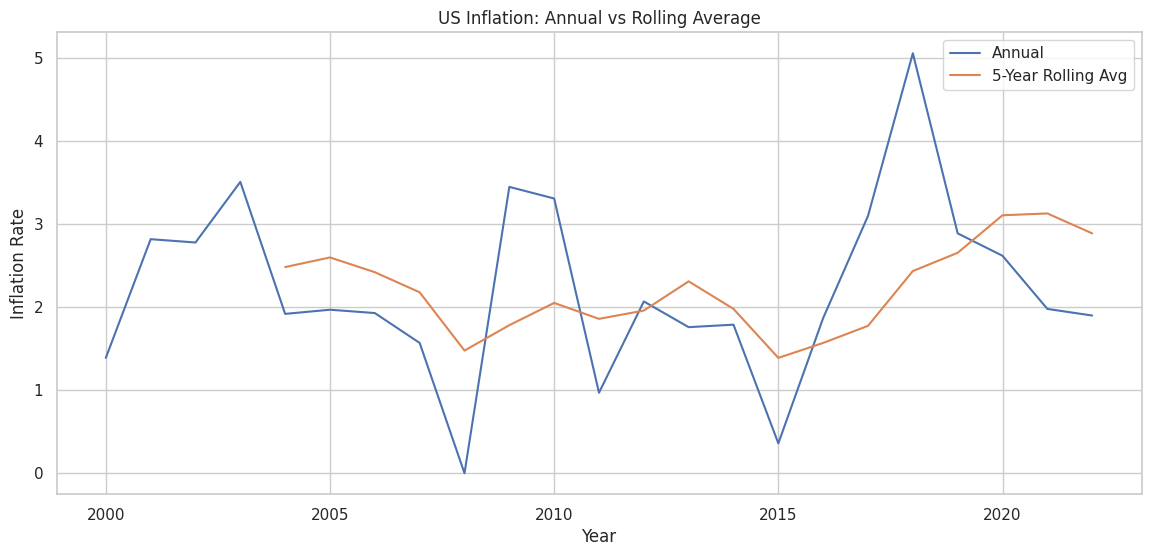

In [ ]:
usa = df[df['Country'] == 'United States'].sort_values('Year')
usa['Rolling_Avg'] = usa['Inflation Rate'].rolling(window=5).mean()

plt.figure(figsize=(14,6))
sns.lineplot(x='Year', y='Inflation Rate', data=usa, label='Annual')
sns.lineplot(x='Year', y='Rolling_Avg', data=usa, label='5-Year Rolling Avg')
plt.title('US Inflation: Annual vs Rolling Average')
plt.show()

Region-wise Comparison

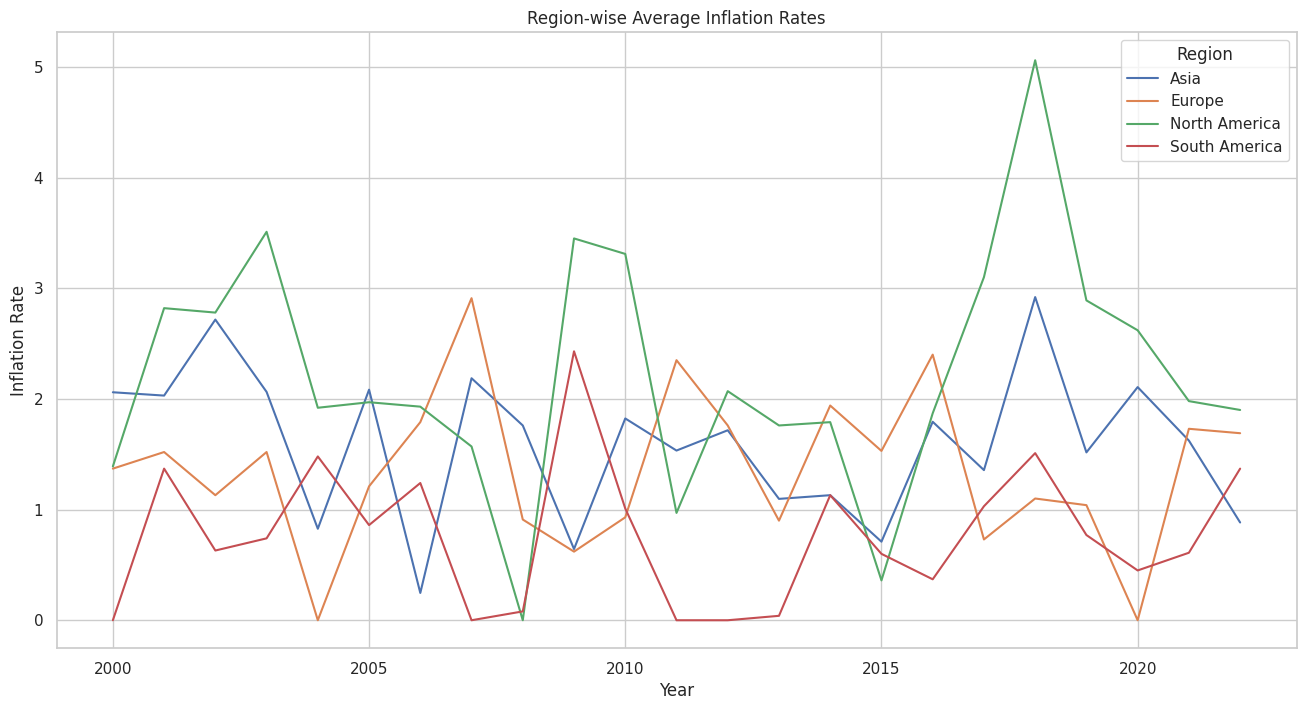

In [ ]:
# Example: Add regions if your dataset has them
# Or add manually for demonstration:
regions = {
    'United States': 'North America',
    'Canada': 'North America',
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'Germany': 'Europe',
    'France': 'Europe',
    'Brazil': 'South America',
    'Argentina': 'South America'
}

df['Region'] = df['Country'].map(regions)

region_avg = df.groupby(['Year', 'Region'])['Inflation Rate'].mean().reset_index()

plt.figure(figsize=(16,8))
sns.lineplot(x='Year', y='Inflation Rate', hue='Region', data=region_avg)
plt.title('Region-wise Average Inflation Rates')
plt.show()

Detect Economic Shocks

In [ ]:
# Example: Identify high spikes
high_inflation = df[df['Inflation Rate'] > 20]
print(high_inflation.head(10))

Empty DataFrame
Columns: [Country, Year, Inflation Rate, Region]
Index: []


This is the complete project for global trends inflation analysis.